# Variational Auto Encoder

## Problem definition

- Given the visible variables $x$, __the data__;
- we need to estimate $h$, __the explanations__.

To this aim, let's study the conditional probability:

$$\large p(h|x) = \frac{p(x,h)}{p(x)} = \frac{p(x|h)p(h)}{\int p(x|h)p(h)dh}$$

Unfortunately, _$p(x)$ is untractable_.

Different approaches to solve this problem.

Two big families include:

- __Monte-Carlo methods__: (eg. MCMC), see the Restricted Boltzmann Machines as an example.
- __Variational inference__: the VAEs are one example of this approach.

## Solution plan

Solution: __do not study__ $\large p(h|x)$, instead:

- choose another (tractable) distribution $q(h|x)$;
- make $q(h|x)$ as close as possible to $p(h|x)$;
- approximate using $q$ instead of $p$.

### Making the two distributions similar

__Adapt the parameters of $q$ so that a measure of "distance" between the distributions is minimized.__

Kullback-Leibler divergence between q and p: __difference of cross-entropies wrt $q$__:

\begin{eqnarray}
\large KL(q||p) 
    &=&\large -H[q] + H[q,p] \\
    &=&\large \sum q(x) \log q(x) - \sum q(x) \log p(x) \\
    &=&\large \sum q(x) \log\left(\frac{q(x)}{p(x)}\right)
\end{eqnarray}

### The variational lower-bound

Computing the $KL$ between $\large q(h|x)$ and $\large p(h|x) = \frac{p(x,h)}{p(x)}$:

$$\large
KL(q(h|x)||p(h|x)) = ... = \log p(x) - \sum q(h|x)\log\left(\frac{p(x,h)}{q(h|x)}\right)
$$

where the following quantity is called __variational lower-bound__ or __evidence lower-bound__ (ELBO):

$$\large
\mathcal{L}(x) = \sum q(h|x)\log\left(\frac{p(x,h)}{q(h|x)}\right)
$$

### The optimization objective

Being $\log p(x)$ a constant (when $x$ is given), being $KL(q||p)\geq0$, considering:

$$\large
\log p(x) = KL(q(h|x)||p(h|x)) + \mathcal{L}(x)
$$

that maximizing $\mathcal{L}(x)$ corresponds to minimize $KL(q||p)$, and:

$$\large
\mathcal{L}(x) \leq \log p(x)
$$

Moreover, it can be easily shown that:

$$\large
\mathcal{L}(x) = \mathbb{E}_{q(h|x)} \log p(x|h) - KL(q(h|x)||p(h))
$$

This means that __maximizing $\mathcal{L}(x)$__:

- __$\Large\mathbb{E}_{q(h|x)} \log p(x|h)$ is maximized__, representing the likelihood of data;
- __$\Large KL(q(h|x)||p(h))$ is minimized__, representing distribution adherence.

## Bring this to neural networks

The network structure is similar to that of an autoencoder.

_The hidden-variable is not estimated, its __distribution parameters__ are._

<img src="images/vae.png" width="500pt"/>

- The first neural-network estimates the parameters of the distribution $p(h)$.
- The second neural-network generates instances of $x$ given the value of $h$.

The stochastic node in the middle is obtained via __reparametrization trick__:

<img src="images/vae_reparam.png" width="750pt"/>

The opptimization must maximize: $\mathcal{L}(x) = \mathbb{E}_{q(h|x)} \log p(x|h) - KL(q(h|x)||p(h))$.

The loss to minimize becomes:

$$\Large
loss = H[q(h|x),p(x|h)] + KL(q,\mathcal{N})
$$

where:

- the first term manages the reconstruction error ;
- the second term drives the hidden variable to a normal distribution.

See https://arxiv.org/pdf/1907.08956.pdf for details.

In [12]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload

from VAE import train, Vae

vae, train_losses, test_losses = train(
    model=Vae(hidden_dim=2),
    epochs=50,
    checkpoint_path='generated/vae');

Epoch: 1, Train loss: 202.5658833984375, Test loss: 180.66572998046874
Epoch: 2, Train loss: 176.3107231282552, Test loss: 174.21682119140624
Epoch: 3, Train loss: 172.97528161621094, Test loss: 171.9946205078125
Epoch: 4, Train loss: 171.50056825358072, Test loss: 170.44346794433594
Epoch: 5, Train loss: 170.4600478515625, Test loss: 169.74905744628907
Epoch: 6, Train loss: 169.43684396158855, Test loss: 168.88457431640626
Epoch: 7, Train loss: 168.78758383789062, Test loss: 168.06398935546875
Epoch: 8, Train loss: 168.18143662109375, Test loss: 167.68033627929688
Epoch: 9, Train loss: 167.791985546875, Test loss: 166.96263125
Epoch: 10, Train loss: 167.43607696940103, Test loss: 166.91105541992187
Epoch: 11, Train loss: 167.19684737955728, Test loss: 167.84099721679686
Epoch: 12, Train loss: 166.9231059000651, Test loss: 167.02778247070313
Epoch: 13, Train loss: 166.65251692708333, Test loss: 166.22102568359375
Epoch: 14, Train loss: 166.5128397705078, Test loss: 166.27236252441406
E

In [3]:
from VAE import save_model

save_model(
    'generated/vae/',
    vae, train_losses, test_losses
)

In [71]:
from VAE import load_model, Vae

vae, train_losses, test_losses = load_model(
    'generated/vae/', Vae())

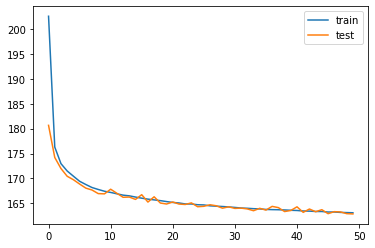

In [72]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train','test'])
plt.show();

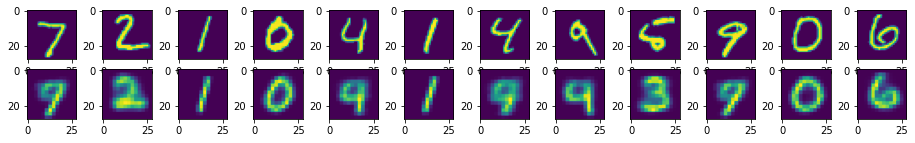

In [73]:
from VAE import mnist_loader
import torch

# Showing some results:
data_loader = mnist_loader()
_, ax = plt.subplots(2, 12, figsize=(16,2))
for i in range(12):
    img, _ = data_loader.dataset[i]
    ax[0,i].imshow(img.permute(1,2,0))
    with torch.no_grad():
        img = torch.unsqueeze(img,0)
        out, _, _ = vae(img)
        out = torch.squeeze(out,0)
    ax[1,i].imshow(out.permute(1,2,0))

In [74]:
import numpy as np

# Plotting the embedding space for test data:
embeddings = np.zeros((len(data_loader.dataset),vae.hidden_dim))
labels = np.zeros((len(data_loader.dataset),))
with torch.no_grad():
    for i in range(embeddings.shape[0]):
        img = data_loader.dataset[i][0]
        img = torch.unsqueeze(img,0)
        emb = vae.encoder(img)
        embeddings[i] = vae.mu(emb)
        labels[i] = data_loader.dataset[i][1]

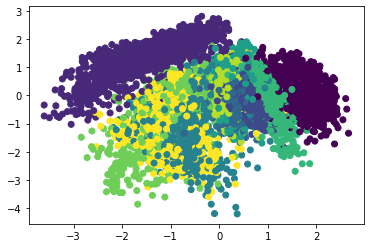

In [75]:
fig = plt.figure()
plt.scatter(embeddings[:,0],embeddings[:,1],c=labels)
plt.show();

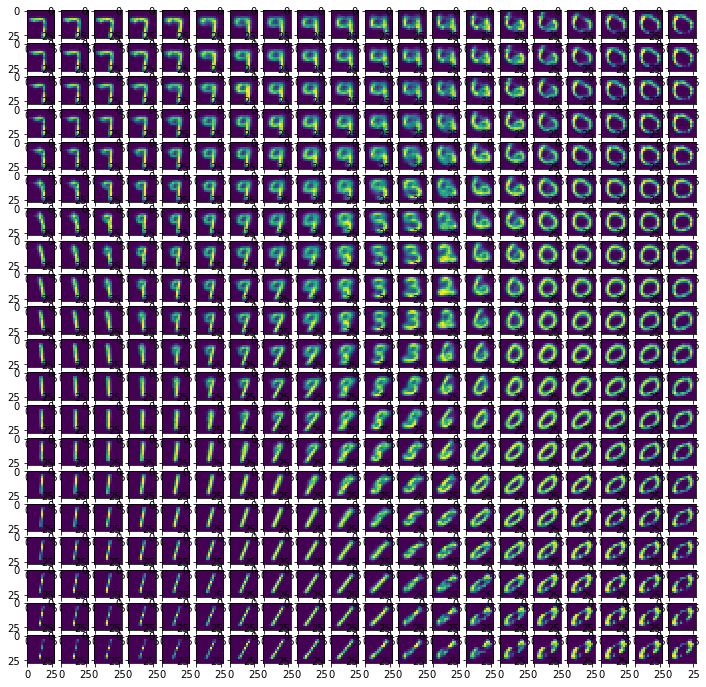

In [77]:
from VAE import vae_samples_2d, plot_vae_samples_2d

# Generating new samples:
samples = vae_samples_2d(vae)
plot_vae_samples_2d(samples)